In [256]:
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.datasets import fetch_olivetti_faces, fetch_lfw_people
import matplotlib.pyplot as plt

In [257]:
faces = fetch_olivetti_faces()

Printing the faces of all 40 subjects

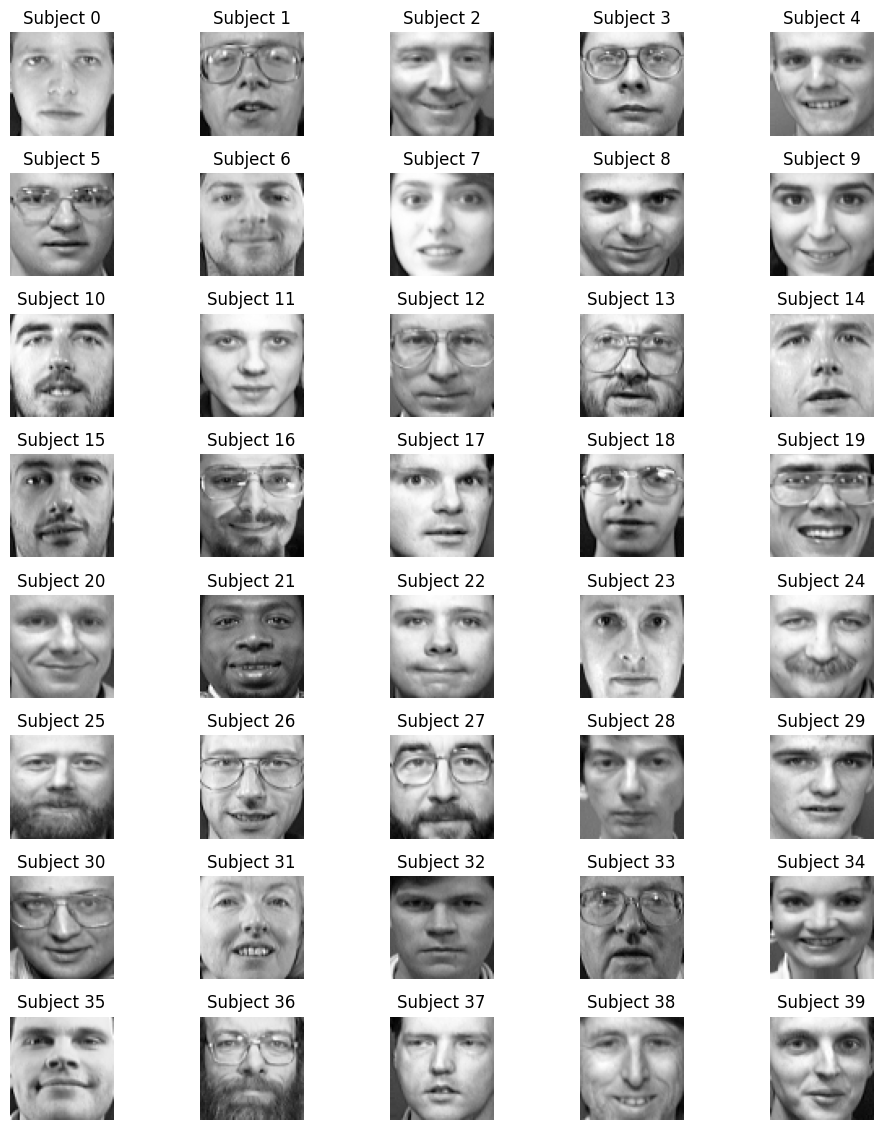

In [276]:
rows = 8
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(10, 12))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces["images"][0 + i * 10], cmap="gray")
    ax.set_axis_off()
    ax.set_title(f"Subject {i}")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [259]:
df = pd.DataFrame(
    data=np.concatenate((faces["target"][:, np.newaxis], faces["data"]), axis=1),
    columns=["Subject"] + [f"Pixel_{_}" for _ in range(1, 4097)],
)
df["Subject"] = df["Subject"].astype("int")
df.head()

,Subject,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,...,Pixel_4087,Pixel_4088,Pixel_4089,Pixel_4090,Pixel_4091,Pixel_4092,Pixel_4093,Pixel_4094,Pixel_4095,Pixel_4096
0,0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,...,0.665289,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,...,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893
2,0,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893
3,0,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,...,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669
4,0,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,...,0.190083,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554


In [260]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, random_state=8, test_size=0.1)

In [261]:
%reload_ext autoreload
%autoreload 2
from Eigenfaces import EigenFaces


In [262]:
ef = EigenFaces()

In [263]:
for subject_id in train["Subject"].unique():
    images = train[train["Subject"] == subject_id].iloc[:, 1:]
    ef.add_subject(subject_id, images)

Added eigenfaces of subject 2...
Added eigenfaces of subject 18...
Added eigenfaces of subject 1...
Added eigenfaces of subject 16...
Added eigenfaces of subject 21...
Added eigenfaces of subject 9...
Added eigenfaces of subject 4...
Added eigenfaces of subject 30...
Added eigenfaces of subject 28...
Added eigenfaces of subject 5...
Added eigenfaces of subject 3...
Added eigenfaces of subject 17...
Added eigenfaces of subject 19...
Added eigenfaces of subject 6...
Added eigenfaces of subject 12...
Added eigenfaces of subject 10...
Added eigenfaces of subject 14...
Added eigenfaces of subject 31...
Added eigenfaces of subject 27...
Added eigenfaces of subject 7...
Added eigenfaces of subject 35...
Added eigenfaces of subject 39...
Added eigenfaces of subject 32...
Added eigenfaces of subject 8...
Added eigenfaces of subject 24...
Added eigenfaces of subject 23...
Added eigenfaces of subject 33...
Added eigenfaces of subject 15...
Added eigenfaces of subject 29...
Added eigenfaces of sub

Mean faces of all subjects

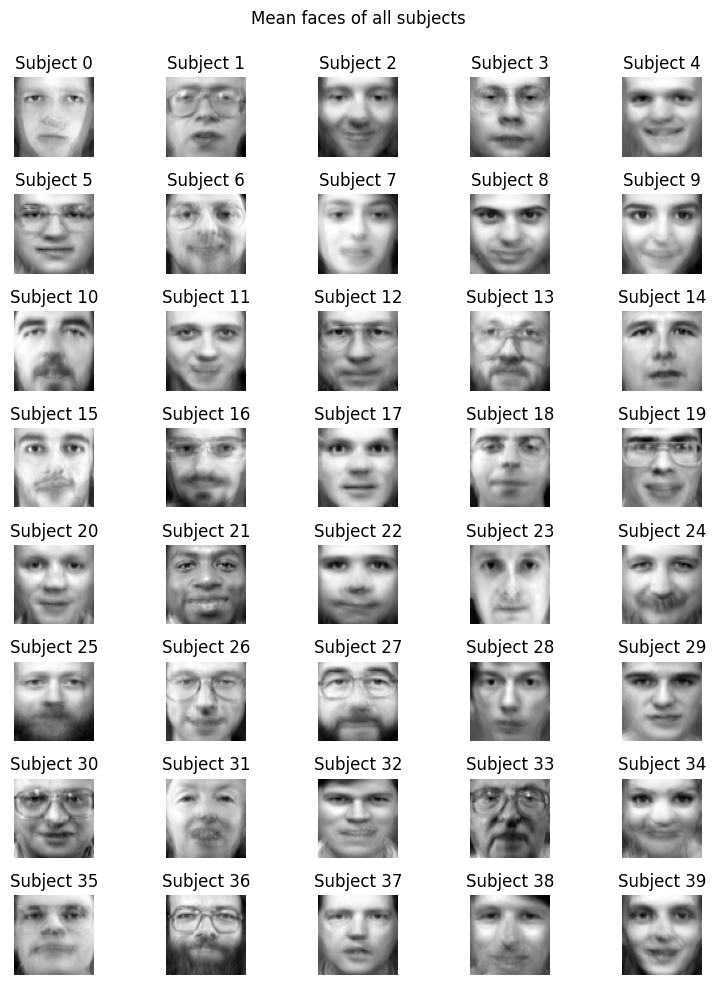

In [275]:
rows = 8
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(8, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(ef.db[i]["mean"].reshape((64, 64)), cmap="gray")
    ax.set_axis_off()
    ax.set_title(f"Subject {i}")
plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.suptitle("Mean faces of all subjects")
plt.show()

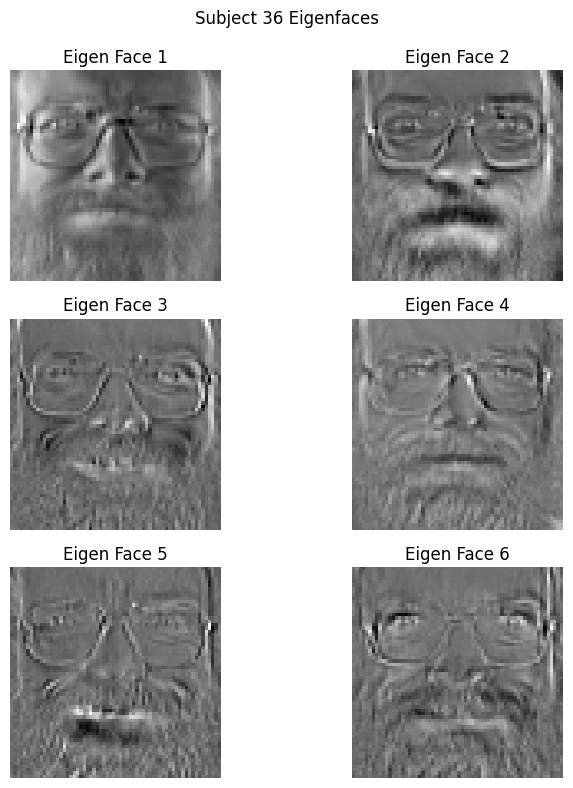

In [264]:
ef.plot_eigen_faces(36)

In [265]:
mis_classified = 0
for _, test_row in test.iterrows():
    true_subject_id = test_row["Subject"]
    test_image = test_row[1:].to_numpy()
    result = ef.recognize(test_image)
    if true_subject_id != result[0]["Subject ID"]:
        print(true_subject_id, result[0])
        mis_classified += 1


In [266]:
print(f"Misclassfied Rate: {mis_classified / test.shape[0]}")

Misclassfied Rate: 0.0


Test using faces from LFW data

In [267]:
import os
from PIL import Image

In [268]:
images_folder_path = "images"
subject_41_train_images = []
subject_41_test_image = []
subject_42_train_images = []
subject_42_test_image = []

subject_41 = 0
subject_42 = 0
for f in os.listdir(images_folder_path):
    if f.lower().startswith(".ds") is True:
        continue
    file_path = os.path.join(images_folder_path, f)
    with Image.open(file_path) as img:
        img_array = np.asarray(img)
        img = img.convert("L")

        if f.lower().startswith("lindsay") is True:
            subject_41 += 1

            if subject_41 <= 8:
                subject_41_train_images.append(img_array)
            else:
                subject_41_test_image = img_array

        elif f.lower().startswith("alejandro") is True:
            subject_42 += 1

            if subject_42 <= 8:
                subject_42_train_images.append(img_array)
            else:
                subject_42_test_image = img_array
        else:
            print(f"Unrecognized file name {f}...")


subject_41_train_images = np.asarray(subject_41_train_images) / 255
subject_41_test_image = np.asarray(subject_41_test_image) / 255
subject_42_train_images = np.asarray(subject_42_train_images) / 255
subject_42_test_image = np.asarray(subject_42_test_image) / 255

In [269]:
ef.add_subject(41, subject_41_train_images.reshape((8, 4096)))
ef.add_subject(42, subject_42_train_images.reshape((8, 4096)))

Added eigenfaces of subject 41...
Added eigenfaces of subject 42...


In [270]:
nearest_subject, residuals = ef.recognize(subject_41_test_image.reshape((4096)))
print(f"Nearest Subject ID is {nearest_subject["Subject ID"]}")
residuals.head()

Nearest Subject ID is 41


,Subject ID,Residual
0,41,34.726349
1,20,39.234859
2,38,48.502957
3,42,54.813223
4,29,56.284946


In [271]:
nearest_subject, residuals = ef.recognize(subject_42_test_image.reshape((4096)))
print(f"Nearest Subject ID is {nearest_subject["Subject ID"]}")
residuals.head()

Nearest Subject ID is 42


,Subject ID,Residual
0,42,27.492923
1,38,29.658552
2,41,33.365947
3,21,38.125767
4,28,42.375432
